In [250]:
import pandas as pd
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

__Dropping the rows with null values__

In [251]:
traindf=pd.read_csv('data/train.csv')
testdf=pd.read_csv('testData.csv')

print(testdf.shape)
traindf.shape

(11275, 28)


(52099, 31)

In [252]:
traindf=traindf.dropna()
testdf=testdf.dropna()

print(testdf.shape)
traindf.shape

(11213, 28)


(51724, 31)

In [253]:
traindf.head(2)

,Race_Time,Race_ID,Course,Distance,distanceYards,Prize,Going,Horse,Trainer,Jockey,betfairSP,Position,timeSecs,pdsBeaten,NMFP,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners,Win,log_MarketOdds_PreviousRun,AvgSpeed
0,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Intervention,Michael Appleby,Aiden Brookes,1.62,2,73.750000,1.987874,0.666667,6,7,75.0,70.0,0.875000,11.03,3.60,2.377268,2.925027,7.0,2.933961,0.467149,10.25,0,2.487404,72.5
1,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Evocative Spark,Darryll Holland,Christian Howarth,7.40,3,74.129997,2.442347,0.500000,6,5,62.0,48.0,0.181818,42.67,4.19,2.401274,2.611219,13.0,1.934009,0.459547,10.25,0,3.776661,55.0


__Dropping leaky columns__

In [254]:
# dropcols=['Win','log_MarketOdds_PreviousRun','Position']

# traindf=traindf.drop(columns=dropcols,errors='ignore')

In [255]:
traindf.head(3)

,Race_Time,Race_ID,Course,Distance,distanceYards,Prize,Going,Horse,Trainer,Jockey,betfairSP,Position,timeSecs,pdsBeaten,NMFP,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners,Win,log_MarketOdds_PreviousRun,AvgSpeed
0,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Intervention,Michael Appleby,Aiden Brookes,1.62,2,73.750000,1.987874,0.666667,6,7,75.0,70.0,0.875000,11.03,3.60,2.377268,2.925027,7.0,2.933961,0.467149,10.25,0,2.487404,72.5
1,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Evocative Spark,Darryll Holland,Christian Howarth,7.40,3,74.129997,2.442347,0.500000,6,5,62.0,48.0,0.181818,42.67,4.19,2.401274,2.611219,13.0,1.934009,0.459547,10.25,0,3.776661,55.0
2,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Sluzewiec,Scott Dixon,Kieran O'Neill,69.12,5,74.940002,3.025291,0.166667,6,5,51.0,59.0,0.000000,141.13,86.83,2.824967,2.925073,50.0,2.411403,0.456616,8.00,0,4.956742,55.0


Removing leaky columns

In [256]:
df=traindf.copy()
# columns to not consider while training the model
dropcols=['Race_Time', 'Horse', 'Distance', 'betfairSP', 'timeSecs', 'pdsBeaten', 'NMFP']

# defining target column
df['target'] = (df['Position'] == 1).astype(int)
df = df.drop(columns=['Position']) 




In [257]:
df

,Race_Time,Race_ID,Course,Distance,distanceYards,Prize,Going,Horse,Trainer,Jockey,betfairSP,timeSecs,pdsBeaten,NMFP,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners,Win,log_MarketOdds_PreviousRun,AvgSpeed,target
0,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Intervention,Michael Appleby,Aiden Brookes,1.62,73.750000,1.987874,0.666667,6,7,75.0,70.0,0.875000,11.03,3.60,2.377268,2.925027,7.0,2.933961,0.467149,10.25,0,2.487404,72.5,0
1,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Evocative Spark,Darryll Holland,Christian Howarth,7.40,74.129997,2.442347,0.500000,6,5,62.0,48.0,0.181818,42.67,4.19,2.401274,2.611219,13.0,1.934009,0.459547,10.25,0,3.776661,55.0,0
2,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Sluzewiec,Scott Dixon,Kieran O'Neill,69.12,74.940002,3.025291,0.166667,6,5,51.0,59.0,0.000000,141.13,86.83,2.824967,2.925073,50.0,2.411403,0.456616,8.00,0,4.956742,55.0,0
3,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Muscika,David O'Meara,Mark Winn,7.72,75.019997,3.065258,0.000000,6,10,65.0,73.0,0.333333,8.97,12.86,2.317504,2.534689,38.0,2.639010,0.462397,10.00,0,2.299581,69.0,0
4,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Venturous,David Barron,David Probert,15.11,74.500000,2.753661,0.333333,6,11,59.0,62.0,0.090909,44.84,18.20,2.292027,2.448742,24.0,2.494198,0.450770,11.00,0,3.825157,60.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52094,2024-12-31 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Fullforward,Michael Madgwick,William Carson,26.24,154.220001,1.998096,0.727273,11,4,56.0,43.0,0.833333,9.04,13.23,2.968319,2.767347,57.0,2.718093,0.480990,8.75,0,2.306577,49.5,0
52095,2024-12-31 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Pablo Prince,Karen Jewell,Luke Morris,12.00,155.119995,2.547490,0.363636,11,6,45.0,55.0,0.500000,48.38,5.09,3.233067,2.457842,40.0,3.019927,0.449697,11.50,0,3.899545,50.0,0
52096,2024-12-31 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Paradoxical,Jennie Candlish,George Wood,2.27,153.160004,0.000000,0.909091,11,3,71.0,58.0,0.800000,6.03,7.12,2.554826,2.555626,5.0,2.584142,0.450076,10.50,1,1.950187,64.5,1
52097,2024-12-31 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Keen Interest,Alice Haynes,Kieran O'Neill,48.97,159.440002,3.654547,0.000000,11,3,53.0,51.0,0.400000,26.57,22.16,2.443137,2.917672,15.0,2.632082,0.456602,10.75,0,3.316728,52.0,0


__One hot encoding to columns with low cardinality__

In [258]:
lowcard=['Going']
df=pd.get_dummies(df,columns=lowcard,drop_first=True)



__Target Encoding for high cardinality__

In [259]:
for col in ['Trainer', 'Jockey','Course']:
    # average win rate across entire data
    target_mean = df.groupby(col)['target'].mean()
    df[col + '_winrate'] = df[col].map(target_mean)
    
# drop high-cardinality categorical columns
df = df.drop(columns=['Trainer', 'Jockey','Course'])


__Normalize the columns__

In [260]:
# df['Prize_rel'] = df.groupby('Race_ID')['Prize'].transform(lambda x: x - x.mean())
df['MarketOdds_PreviousRun_rel'] = df.groupby('Race_ID')['MarketOdds_PreviousRun'].transform(lambda x: x / x.mean())

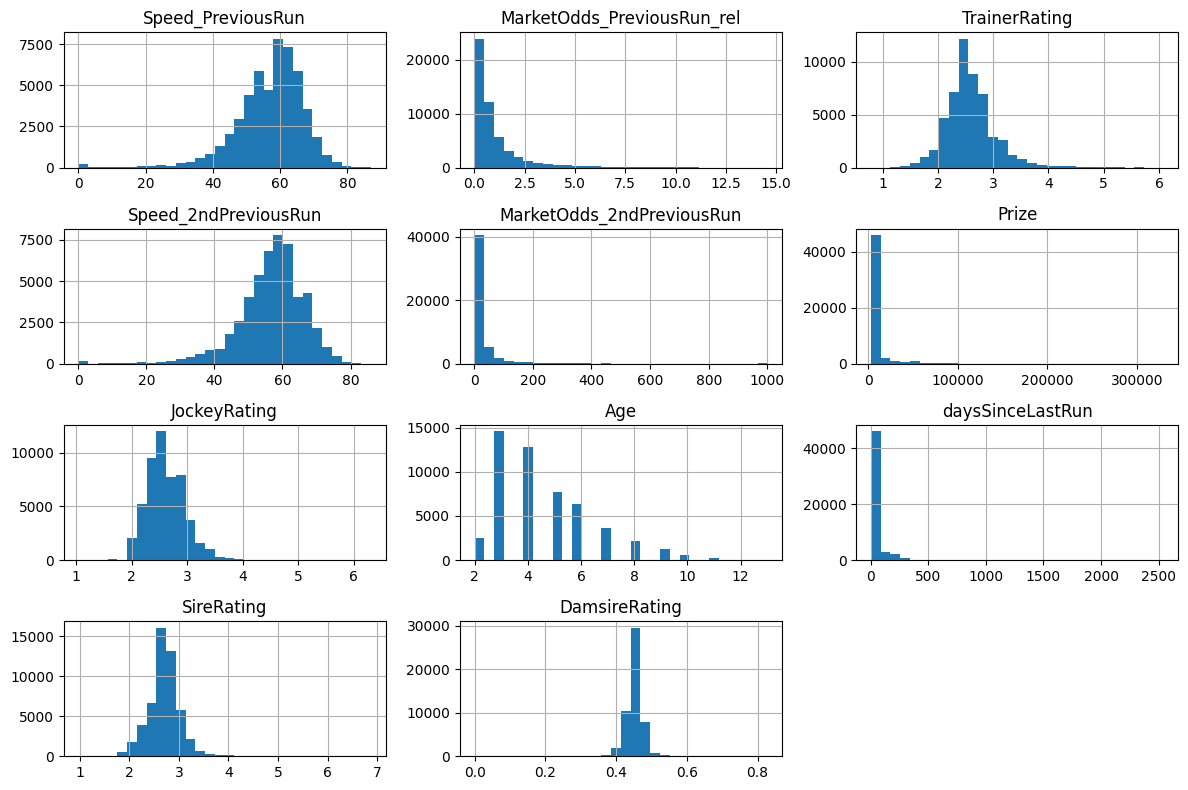

In [261]:
numeric_cols = ['Speed_PreviousRun', 'MarketOdds_PreviousRun_rel', 'TrainerRating',
    'Speed_2ndPreviousRun',
    'MarketOdds_2ndPreviousRun',
    'Prize',
    'JockeyRating',
    'Age',
    'daysSinceLastRun',
    'SireRating',
    'DamsireRating']
df[numeric_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

In [262]:
relative_features = ['Speed_PreviousRun', 'MarketOdds_PreviousRun_rel', 'TrainerRating',
    'Speed_2ndPreviousRun',
    'MarketOdds_2ndPreviousRun',
    'JockeyRating',
    'Age',
    'daysSinceLastRun',
    'SireRating',
    'DamsireRating']

for col in relative_features:
    df[f'{col}_rel'] = df[col] - df.groupby('Race_ID')[col].transform('mean')


__Dropping the final leaky columns__

In [263]:
leakycols=['betfairSP', 'timeSecs', 'pdsBeaten', 'NMFP']
df=df.drop(columns=leakycols)

In [264]:

drop_cols = ['Race_ID','Race_Time', 'Horse', 'Distance', 'Course', 'Going', 'Trainer', 'Jockey']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

In [265]:
df.shape

(51724, 39)

In [266]:
df.head()

,distanceYards,Prize,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners,Win,log_MarketOdds_PreviousRun,AvgSpeed,target,Going_Good,Going_Good To Firm,Going_Good To Soft,Going_Heavy,Going_Soft,Going_Standard,Trainer_winrate,Jockey_winrate,Course_winrate,MarketOdds_PreviousRun_rel,Speed_PreviousRun_rel,MarketOdds_PreviousRun_rel_rel,TrainerRating_rel,Speed_2ndPreviousRun_rel,MarketOdds_2ndPreviousRun_rel,JockeyRating_rel,Age_rel,daysSinceLastRun_rel,SireRating_rel,DamsireRating_rel
0,1340,4972,6,7,75.0,70.0,0.875000,11.03,3.60,2.377268,2.925027,7.0,2.933961,0.467149,10.25,0,2.487404,72.5,0,False,False,False,False,False,True,0.088571,0.078431,0.109885,0.246004,12.5,-0.753996,-0.059273,7.166667,-22.18,0.186096,0.0,-31.333333,0.369122,0.011352
1,1340,4972,6,5,62.0,48.0,0.181818,42.67,4.19,2.401274,2.611219,13.0,1.934009,0.459547,10.25,0,3.776661,55.0,0,False,False,False,False,False,True,0.118227,0.053571,0.109885,0.951676,-0.5,-0.048324,-0.035266,-14.833333,-21.59,-0.127712,-2.0,-25.333333,-0.630830,0.003750
2,1340,4972,6,5,51.0,59.0,0.000000,141.13,86.83,2.824967,2.925073,50.0,2.411403,0.456616,8.00,0,4.956742,55.0,0,False,False,False,False,False,True,0.072144,0.084063,0.109885,3.147647,-11.5,2.147647,0.388426,-3.833333,61.05,0.186142,-2.0,11.666667,-0.153437,0.000819
3,1340,4972,6,10,65.0,73.0,0.333333,8.97,12.86,2.317504,2.534689,38.0,2.639010,0.462397,10.00,0,2.299581,69.0,0,False,False,False,False,False,True,0.137517,0.100917,0.109885,0.200059,2.5,-0.799941,-0.119037,10.166667,-12.92,-0.204242,3.0,-0.333333,0.074170,0.006600
4,1340,4972,6,11,59.0,62.0,0.090909,44.84,18.20,2.292027,2.448742,24.0,2.494198,0.450770,11.00,0,3.825157,60.5,0,False,False,False,False,False,True,0.109589,0.134884,0.109885,1.000074,-3.5,0.000074,-0.144513,-0.833333,-7.58,-0.290189,4.0,-14.333333,-0.070642,-0.005027


__Class Imblaance__

In [267]:
df['Win'].value_counts(normalize=True)

Win
0    0.896895
1    0.103105
Name: proportion, dtype: float64

__Model Building__

In [268]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [269]:
df.columns = df.columns.str.replace(' ', '_') # removing white spaces from column names

In [271]:
target='Win'
# features=df.drop(columns=['Win', 'target', 'betfairSP', 'Race_Time', 'Horse', 'Trainer', 'Jockey', 'Distance', 'Race_ID', 'Course'], errors='ignore')
y = df[target]

X = df.drop(columns=['Win', 'target', 'betfairSP', 'Race_Time', 'Horse', 'Trainer', 'Jockey', 'Course','Speed_PreviousRun','Speed_2ndPreviousRun',
'Age_rel'], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y) # stratify will ensure the consisten distribtuion across the data

# -------------------------------------------------------
# handling class imbalance

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# -----------------------------------------------------
# hyperparameter tuning
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}
# ----------------------------------
gridsearch = GridSearchCV(lgb.LGBMClassifier(objective='binary'), param_grid, cv=3, scoring='roc_auc')
gridsearch.fit(X_train_smote, y_train_smote)
print(f"Best Hyperparameters: {gridsearch.best_params_}")
print(f"Best Cross-Validation Score: {gridsearch.best_score_}")

# --------------------------------



model = gridsearch.best_estimator_

# model=lgb.LGBMClassifier(
#     learning_rate= 0.01, n_estimators= 200, num_leaves=50,
#     objective='binary',metric='auc',random_state=42,
#     # class_weight='balanced'  # Add this line to adjust for class imbalance
# )
# model.fit(X_train,y_train)

# prediction
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# oerformance evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))

actual_win_1 = sum(y_test == 1)
predicted_win_1 = sum(y_pred == 1)

print(f"\nNumber of actual wins (y_test=1): {actual_win_1}")
print(f"Number of predicted wins (y_pred=1): {predicted_win_1}")


[LightGBM] [Info] Number of positive: 20721, number of negative: 20721
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6672
[LightGBM] [Info] Number of data points in the train set: 41442, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 20722, number of negative: 20721
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6671
[LightGBM] [Info] Number of data points in the train set: 41443, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500012 -> initscore=0.000048
[LightGBM] [Info] Start training from score 0.000048
[LightGBM] [Info] Number of positive: 20721, number of negative: 2072

In [272]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("CV AUC Scores:", cv_scores)
print("Mean AUC:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

[LightGBM] [Info] Number of positive: 4267, number of negative: 37112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6012
[LightGBM] [Info] Number of data points in the train set: 41379, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.103120 -> initscore=-2.163029
[LightGBM] [Info] Start training from score -2.163029
[LightGBM] [Info] Number of positive: 4266, number of negative: 37113
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6069
[LightGBM] [Info] Number of data points in the train set: 41379, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.103096 -> initscore=-2.163291
[LightGBM] [Info] Start training from score -2.163291
[LightGBM] [In

In [273]:
# saving model
import joblib
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

joblib.dump(model, 'GradientBoosting_model.pkl')

print("Accuracy:", accuracy_score(y_test, y_pred))  # accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))  # precision, recall and f1score

Accuracy: 0.8898588083660437
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     15309
           1       0.29      0.05      0.08      1760

    accuracy                           0.89     17069
   macro avg       0.60      0.52      0.51     17069
weighted avg       0.84      0.89      0.85     17069

